# Autoencoder: AE

In this notebook we explore the using of AEs for anomaly detection. For this purpose, we will use the following procedure:

1. We use the train set for the training process. We use a non-contaminated version of the public test set for validation (to decide early stopping and avoid the overfitting over the training set).
2. The performance of the model was measured over the private test set.


TODO: 
1. Check if the performance improves when using QuantileTransform instead of MinMaxScaler. -> QuantileTransform is fundamental.
2. Check if the performance improves when using only curves with more than 20 detections in both bands. -> Results improves.
3. Check if the performance improves when more importance to the most important features of the Supervised RF-Detector are given.

In [1]:
import torch 

import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

from barbar import Bar

from preprocess import get_ALeRCE_data
from ae.train import TrainerAE
from ae.test import eval

In [2]:
class Args:
    batch_size = 128
    num_epochs = 1000
    lr = 5e-5
    patience = 100
    lr_milestones = [250, 500]
    latent_dim=32

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    
args = Args() # Parsing all the arguments for the training

dataloader_train, scaler, classes = get_ALeRCE_data(args.batch_size, 'train', mode='train')
dataloader_val, _, _ = get_ALeRCE_data(args.batch_size, 'val', mode='val', scaler=scaler)

## Training

In [3]:
ae = TrainerAE(args, dataloader_train, dataloader_val, device)
ae.train()

27058/27058: [===============================>] - ETA 0.3ss
Training Autoencoder... Epoch: 0, Loss: 0.055
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 0, Loss: 0.0473
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 1, Loss: 0.041
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 1, Loss: 0.0387
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 2, Loss: 0.033
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 2, Loss: 0.0333
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 3, Loss: 0.029
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 3, Loss: 0.0295
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 4, Loss: 0.026
47

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 37, Loss: 0.007
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 37, Loss: 0.00839
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 38, Loss: 0.007
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 38, Loss: 0.00828
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 39, Loss: 0.007
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 39, Loss: 0.00814
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 40, Loss: 0.007
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 40, Loss: 0.00805
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 41, Loss: 0.007
4741/

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 74, Loss: 0.005
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 74, Loss: 0.00618
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 75, Loss: 0.005
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 75, Loss: 0.00615
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 76, Loss: 0.005
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 76, Loss: 0.00613
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 77, Loss: 0.005
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 77, Loss: 0.00607
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 78, Lo

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 111, Loss: 0.004
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 111, Loss: 0.00513
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 112, Loss: 0.004
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 112, Loss: 0.00511
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 113, Loss: 0.004
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 113, Loss: 0.00508
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 114, Loss: 0.004
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 114, Loss: 0.00514
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 115, Loss: 0.

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 148, Loss: 0.004
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 148, Loss: 0.00447
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 149, Loss: 0.004
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 149, Loss: 0.00447
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 150, Loss: 0.004
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 150, Loss: 0.00446
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 151, Loss: 0.004
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 151, Loss: 0.00432
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 152, Loss: 0.004
4741/4741: [==============

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 186, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 186, Loss: 0.00391
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 187, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 187, Loss: 0.00388
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 188, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 188, Loss: 0.00384
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 189, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 189, Loss: 0.00392
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 190, Loss: 0.

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 224, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 224, Loss: 0.00359
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 225, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 225, Loss: 0.00353
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 226, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 226, Loss: 0.00364
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 227, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 227, Loss: 0.00364
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 228, Loss: 0.003
4741/4741: [==============

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 262, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 262, Loss: 0.00321
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 263, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 263, Loss: 0.00327
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 264, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 264, Loss: 0.00321
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 265, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 265, Loss: 0.0032
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 266, Loss: 0.003
4741/4741: [==============================

4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 299, Loss: 0.00315
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 300, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 300, Loss: 0.00315
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 301, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 301, Loss: 0.00317
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 302, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 302, Loss: 0.00315
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 303, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 303, Loss: 0.00314
Weights saved.
27058/27058:

4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 337, Loss: 0.00313
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 338, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 338, Loss: 0.00312
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 339, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 339, Loss: 0.00311
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 340, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 340, Loss: 0.0031
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 341, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 341, Loss: 0.00309
Weights saved.
27058/27058: 

4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 375, Loss: 0.00309
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 376, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 376, Loss: 0.00307
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 377, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 377, Loss: 0.00308
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 378, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 378, Loss: 0.00308
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 379, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 379, Loss: 0.00311
27058/27058: [=============

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 414, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 414, Loss: 0.00306
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 415, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 415, Loss: 0.00303
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 416, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 416, Loss: 0.00307
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 417, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 417, Loss: 0.00305
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 418, Loss: 0.003
4741/4741: [==============

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 452, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 452, Loss: 0.00305
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 453, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 453, Loss: 0.0031
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 454, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 454, Loss: 0.00304
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 455, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 455, Loss: 0.00305
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 456, Loss: 0.003
4741/4741: [==============================

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 490, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 490, Loss: 0.00298
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 491, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 491, Loss: 0.003
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 492, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 492, Loss: 0.003
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 493, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 493, Loss: 0.003
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 494, Loss: 0.003
4741/4741: [====================

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 529, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 529, Loss: 0.00299
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 530, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 530, Loss: 0.003
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 531, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 531, Loss: 0.00302
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 532, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 532, Loss: 0.003
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 533, Loss: 0.003
4741/4741: [===============================>]

4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 567, Loss: 0.00299
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 568, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 568, Loss: 0.00296
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 569, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 569, Loss: 0.00302
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 570, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 570, Loss: 0.00303
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 571, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 571, Loss: 0.00298
27058/27058: [=============

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 606, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 606, Loss: 0.00298
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 607, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 607, Loss: 0.00298
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 608, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 608, Loss: 0.00299
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 609, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 609, Loss: 0.00297
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 610, Loss: 0.003
4741/4741: [=============================

4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 644, Loss: 0.00298
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 645, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 645, Loss: 0.00296
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 646, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 646, Loss: 0.00298
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 647, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 647, Loss: 0.00299
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 648, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 648, Loss: 0.00298
27058/27058: [============================

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 683, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 683, Loss: 0.00297
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 684, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 684, Loss: 0.00298
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 685, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 685, Loss: 0.00297
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 686, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 686, Loss: 0.00295
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 687, Loss: 0.003
4741/4741: [==============

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 722, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 722, Loss: 0.00297
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 723, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 723, Loss: 0.00296
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 724, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 724, Loss: 0.00297
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 725, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 725, Loss: 0.00299
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 726, Loss: 0.003
4741/4741: [=============================

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 761, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 761, Loss: 0.00297
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 762, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 762, Loss: 0.00299
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 763, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 763, Loss: 0.00298
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 764, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 764, Loss: 0.00298
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 765, Loss: 0.003
4741/4741: [=============================

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 799, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 799, Loss: 0.00297
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 800, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 800, Loss: 0.00296
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 801, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 801, Loss: 0.00297
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 802, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 802, Loss: 0.00297
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 803, Loss: 0.003
4741/4741: [=============================

4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 837, Loss: 0.00296
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 838, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 838, Loss: 0.00295
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 839, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 839, Loss: 0.00296
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 840, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 840, Loss: 0.00296
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 841, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 841, Loss: 0.00295
27058/27058: [============================

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 876, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 876, Loss: 0.00296
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 877, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 877, Loss: 0.00299
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 878, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 878, Loss: 0.00296
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 879, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 879, Loss: 0.00296
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 880, Loss: 0.002
4741/4741: [=============================

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 915, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 915, Loss: 0.00296
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 916, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 916, Loss: 0.00295
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 917, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 917, Loss: 0.00295
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 918, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 918, Loss: 0.00295
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 919, Loss: 0.002
4741/4741: [=============================

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 954, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 954, Loss: 0.00299
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 955, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 955, Loss: 0.00295
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 956, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 956, Loss: 0.00296
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 957, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 957, Loss: 0.00295
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 958, Loss: 0.002
4741/4741: [=============================

27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 992, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 992, Loss: 0.00294
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 993, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 993, Loss: 0.00294
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 994, Loss: 0.003
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 994, Loss: 0.00296
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 995, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 995, Loss: 0.00293
27058/27058: [===============================>] - ETA 0.0s
Training Autoencoder... Epoch: 996, Loss: 0.003
4741/4741: [=============================

In [4]:
ae.load_weights()

## Learning curve

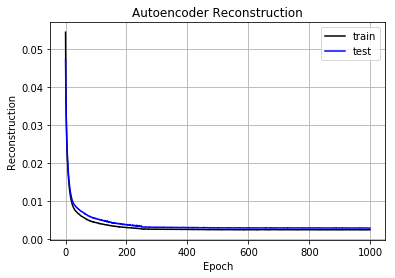

In [5]:
def plot_loss(values, values_t, metric):
    plt.plot(np.arange(len(values)), values, c='k', label='train')
    plt.plot(np.arange(len(values_t)), values_t, c='b', label='test')
    plt.title('Autoencoder {}'.format(metric))
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.grid(True)

plot_loss(np.array(ae.reconst), np.array(ae.reconst_t), 'Reconstruction')

## Evaluation

In [6]:
dataloader_test, _, _ = get_ALeRCE_data(args.batch_size, 'test', mode='test', scaler=scaler)
labels1, labels2, labels3, scores, latent = eval(ae.model, dataloader_test, device)

Testing...
ROC AUC score: 0.607


In [7]:
x_embedded = TSNE(n_components=2).fit_transform(latent)

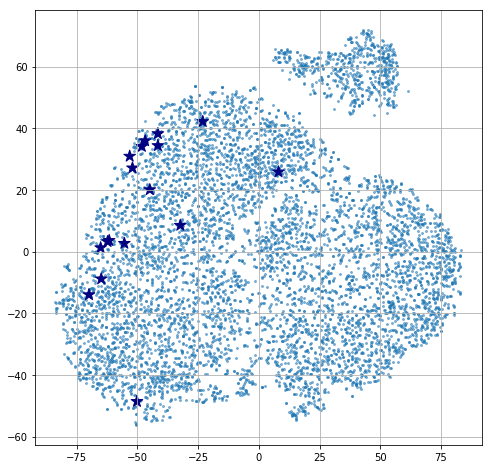

In [8]:
plt.figure(figsize=(8,8))
cmap = plt.get_cmap('jet', 4)
plt.scatter(x_embedded[:, 0][labels2==0], x_embedded[:, 1][labels2==0],
            s=15, alpha=0.5, marker='.')
plt.scatter(x_embedded[:, 0][labels2!=0], x_embedded[:, 1][labels2!=0], 
            c=labels2[labels2!=0].reshape(-1,),
            s=150, cmap=cmap, marker='*')

plt.grid(True)

In [9]:
scores_in = scores[labels1==0]
scores_out = scores[labels1==1]

scores_ELL = scores[labels2==1]
scores_TDE = scores[labels2==2]
scores_SNIIb = scores[labels2==3]
scores_WRayot = scores[labels2==4]

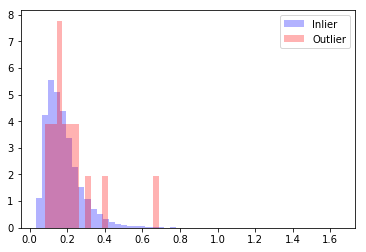

In [10]:
plt.hist(scores_in, bins=50, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_out, bins=20, color='r', alpha=0.3, density=True, label='Outlier')
plt.legend()

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


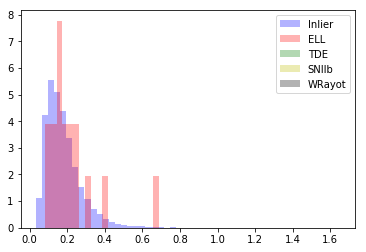

In [11]:
plt.hist(scores_in, bins=50, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_ELL, bins=20, color='r', alpha=0.3, density=True, label='ELL')
plt.hist(scores_TDE, bins=1, color='g', alpha=0.3, density=True, label='TDE')
plt.hist(scores_SNIIb, bins=20, color='y', alpha=0.3, density=True, label='SNIIb')
plt.hist(scores_WRayot, bins=10, color='k', alpha=0.3, density=True, label='WRayot')
plt.legend()

In [12]:
ae.model.eval()
with torch.no_grad():
    for x, y, _, _ in dataloader_test:
        x = x.float().to(device)
        x_hat, z = ae.model(x)
        print(x)
        print(x_hat)

tensor([[0.0194, 0.5664, 0.3313,  ..., 0.2500, 0.2442, 0.2072],
        [0.6814, 0.0000, 0.2155,  ..., 0.0000, 0.7534, 0.1321],
        [0.1941, 0.7605, 0.7737,  ..., 0.0000, 0.6236, 0.5251],
        ...,
        [0.5178, 0.0000, 0.1828,  ..., 0.2499, 0.6448, 0.7694],
        [0.7500, 0.2119, 0.3281,  ..., 0.0000, 0.2942, 0.2495],
        [0.2803, 0.6871, 0.7541,  ..., 0.0000, 0.7687, 0.1611]],
       device='cuda:0')
tensor([[0.0831, 0.4745, 0.4234,  ..., 0.2074, 0.2410, 0.2529],
        [0.7003, 0.0067, 0.2412,  ..., 0.0336, 0.7438, 0.1799],
        [0.2404, 0.7221, 0.6196,  ..., 0.0524, 0.5015, 0.6075],
        ...,
        [0.4566, 0.0025, 0.2082,  ..., 0.1041, 0.5311, 0.7193],
        [0.7275, 0.2147, 0.2279,  ..., 0.0379, 0.3053, 0.2955],
        [0.2901, 0.6724, 0.7236,  ..., 0.0250, 0.7635, 0.1863]],
       device='cuda:0')
tensor([[0.7500, 0.0000, 0.2384,  ..., 0.0000, 0.2267, 0.1986],
        [0.0485, 0.0000, 0.2258,  ..., 0.0000, 0.2195, 0.5483],
        [0.2744, 0.2622, 0.5

tensor([[0.0116, 0.3534, 0.2323,  ..., 0.7198, 0.2245, 0.7783],
        [0.7500, 0.6367, 0.2754,  ..., 0.0000, 0.2993, 0.1215],
        [0.1841, 0.7523, 0.7688,  ..., 0.0000, 0.2291, 0.6079],
        ...,
        [0.0862, 0.5588, 0.5676,  ..., 0.2909, 0.7566, 0.6244],
        [0.2881, 0.7629, 0.7786,  ..., 0.0000, 0.6597, 0.3832],
        [0.0819, 0.0000, 0.6125,  ..., 0.0000, 0.5509, 0.3991]],
       device='cuda:0')
tensor([[0.0418, 0.3940, 0.2534,  ..., 0.6781, 0.2671, 0.8658],
        [0.7457, 0.5946, 0.3664,  ..., 0.0192, 0.2910, 0.1290],
        [0.2044, 0.7284, 0.8029,  ..., 0.0182, 0.2318, 0.6477],
        ...,
        [0.0783, 0.5272, 0.5438,  ..., 0.2618, 0.7198, 0.5926],
        [0.2875, 0.7994, 0.8457,  ..., 0.0220, 0.6839, 0.3436],
        [0.0761, 0.0257, 0.5439,  ..., 0.0174, 0.6761, 0.3615]],
       device='cuda:0')
tensor([[0.2611, 0.4735, 0.5891,  ..., 0.8700, 0.2196, 0.7973],
        [0.3157, 0.2463, 0.4549,  ..., 0.0000, 0.6657, 0.5616],
        [0.2770, 0.4707, 0.4

tensor([[0.5809, 0.0209, 0.3903,  ..., 0.0215, 0.7548, 0.2545],
        [0.7316, 0.2406, 0.2560,  ..., 0.6597, 0.6196, 0.2359],
        [0.7084, 0.0215, 0.6296,  ..., 0.2391, 0.7773, 0.2947],
        ...,
        [0.0811, 0.6786, 0.6969,  ..., 0.4016, 0.4738, 0.6885],
        [0.4420, 0.0056, 0.4303,  ..., 0.3424, 0.1981, 0.7883],
        [0.7376, 0.5112, 0.3911,  ..., 0.0181, 0.7217, 0.1821]],
       device='cuda:0')
tensor([[0.4081, 0.2834, 0.2238,  ..., 0.0000, 0.6530, 0.7664],
        [0.2567, 0.7557, 0.7595,  ..., 0.0000, 0.3376, 0.7589],
        [0.2605, 0.6646, 0.7064,  ..., 0.6950, 0.4926, 0.2100],
        ...,
        [0.4641, 0.5462, 0.5694,  ..., 0.0000, 0.6604, 0.1106],
        [0.7501, 0.4224, 0.4096,  ..., 0.0000, 0.4308, 0.7857],
        [0.6150, 0.2792, 0.4437,  ..., 0.0000, 0.6609, 0.6878]],
       device='cuda:0')
tensor([[0.3740, 0.2573, 0.2920,  ..., 0.0250, 0.5985, 0.7529],
        [0.2353, 0.7266, 0.7859,  ..., 0.0294, 0.3279, 0.7245],
        [0.1781, 0.6638, 0.7

In [13]:
latents = []
labels2 = []
ae.model.eval()
print('Testing...')
with torch.no_grad():
    for x, _, y2, _ in dataloader_train:
        x = x.float().to(device)
        x_hat, z = ae.model(x)
        latents.append(z.detach().cpu())
        labels2.append(y2.cpu())
labels2 = torch.cat(labels2).numpy().reshape(-1,)
latents = torch.cat(latents).numpy()

Testing...


In [14]:
np.unique(labels2, return_counts=True), classes

((array([0., 1., 2., 3.], dtype=float32), array([6649, 6808, 6747, 6854])),
 array(['Ceph', 'DSCT', 'EB', 'RRL'], dtype=object))

In [15]:
x_embedded = TSNE(n_components=2).fit_transform(latents)

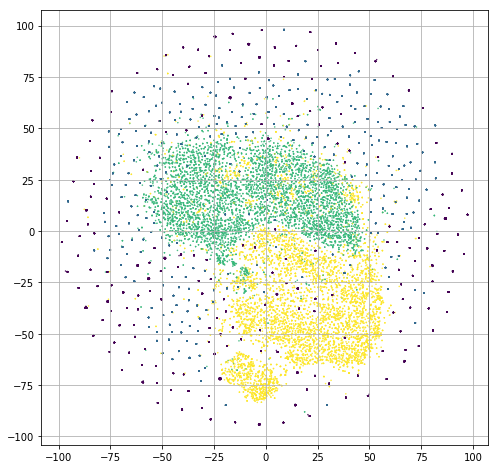

In [18]:
plt.figure(figsize=(8,8))
cmap = plt.get_cmap('jet', 4)
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=labels2, 
            s=1, alpha=1, marker='.')
plt.grid(True)